In [1]:
#Since I am passionate about both coding and art, here is a student_grade prediction project where i have used 
#my own data in csv file which consists of a brief about professional art classes

In [31]:
import pandas as pd
import numpy as np

In [32]:
data=pd.read_csv("artist.csv")
data

,school,sex,age,address,Astatus,status,guardian,failures,P(out of 5),absences,mode,Final,paid,activities
0,Loyola,F,19,U,yes,B,mother,0,2,6,acrylic,5,no,no
1,Loyola,F,18,U,yes,I,father,0,4,4,watercolor,10,no,no
2,Loyola,F,17,U,yes,I,mother,3,2,10,watercolor,2,yes,no
3,Loyola,F,15,U,yes,I,mother,0,4,2,watercolor,10,yes,yes
4,Loyola,F,15,U,yes,I,father,0,4,4,watercolor,10,yes,no
5,Loyola,M,16,U,yes,I,mother,0,4,10,watercolor,10,yes,yes
6,Loyola,M,16,U,yes,B,mother,0,2,0,watercolor,5,no,no
7,Loyola,F,16,U,yes,B,mother,0,2,6,watercolor,5,no,no
8,Loyola,M,17,U,yes,B,mother,0,2,0,watercolor,5,yes,no
9,Loyola,M,15,U,yes,B,mother,0,2,0,watercolor,5,yes,yes


In [33]:
data.head()

,school,sex,age,address,Astatus,status,guardian,failures,P(out of 5),absences,mode,Final,paid,activities
0,Loyola,F,19,U,yes,B,mother,0,2,6,acrylic,5,no,no
1,Loyola,F,18,U,yes,I,father,0,4,4,watercolor,10,no,no
2,Loyola,F,17,U,yes,I,mother,3,2,10,watercolor,2,yes,no
3,Loyola,F,15,U,yes,I,mother,0,4,2,watercolor,10,yes,yes
4,Loyola,F,15,U,yes,I,father,0,4,4,watercolor,10,yes,no


In [34]:
#number of rows and columns
data.shape

(49, 14)

In [35]:
#Final Grade

In [36]:
data['Final'].describe()

count    49.000000
mean      6.551020
std       2.638349
min       2.000000
25%       5.000000
50%       5.000000
75%      10.000000
max      10.000000
Name: Final, dtype: float64

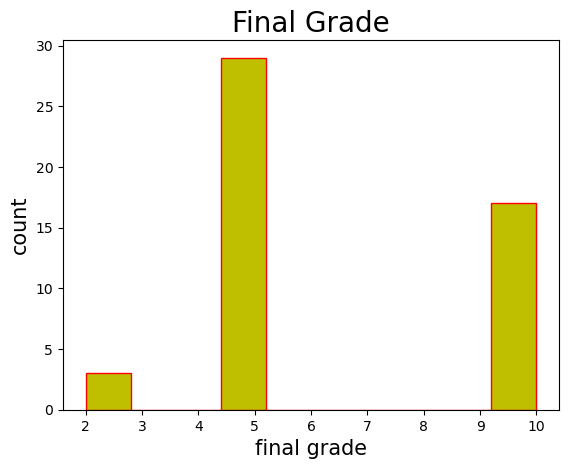

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline
c=["y"]
plt.hist(data['Final'],color=c,edgecolor="r")
plt.title('Final Grade',fontsize=20)
plt.xlabel('final grade',fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

In [38]:
#since we do not need the null values for prediction ,we find them and convert them to 0
data.isnull().any()

school         False
sex            False
age            False
address        False
Astatus        False
status         False
guardian       False
failures       False
P(out of 5)    False
absences       False
mode           False
Final          False
paid           False
activities     False
dtype: bool

In [39]:
data.isnull().sum()

school         0
sex            0
age            0
address        0
Astatus        0
status         0
guardian       0
failures       0
P(out of 5)    0
absences       0
mode           0
Final          0
paid           0
activities     0
dtype: int64

In [40]:
male_student = len(data[data['sex'] == 'M'])
female_student= len(data[data['sex'] == 'F'])
print('Number of male students:',male_student)
print('Number of female students:',female_student)

Number of male students: 29
Number of female students: 20


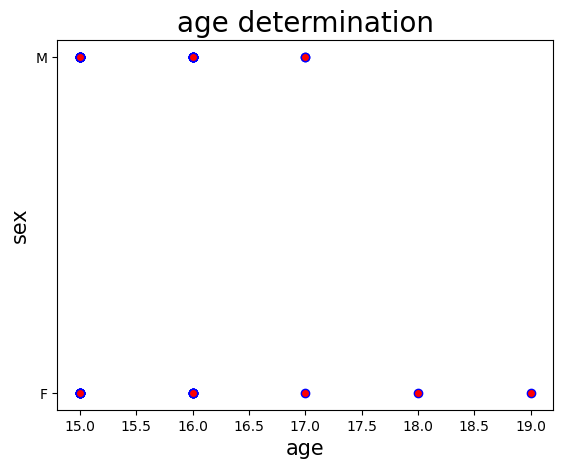

In [41]:
plt.scatter(data['age'],data['sex'],color="r",edgecolor="b")
plt.title('age determination',fontsize=20)
plt.xlabel('age',fontsize=15)
plt.ylabel("sex",fontsize=15)
plt.show()

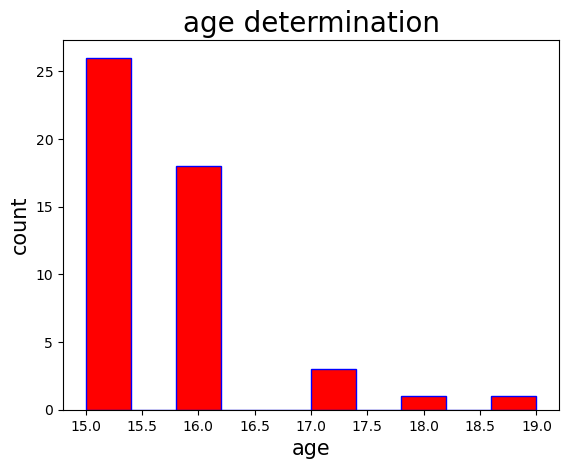

In [42]:
plt.hist(data['age'],color="r",edgecolor="b")
plt.title('age determination',fontsize=20)
plt.xlabel('age',fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

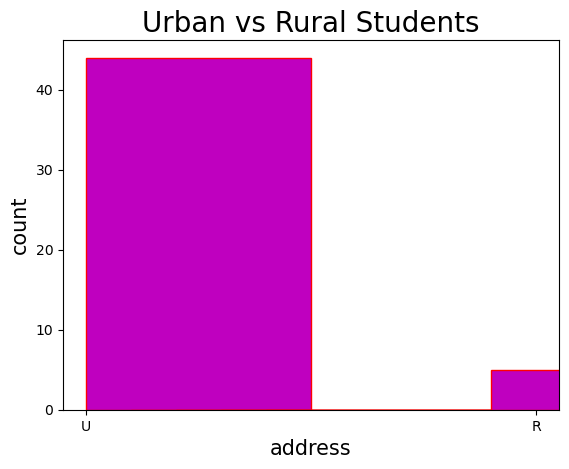

In [43]:
plt.hist(data['address'],color="m",width=0.5,edgecolor="r")
plt.title('Urban vs Rural Students',fontsize=20)
plt.xlabel('address',fontsize=15)
plt.ylabel("count",fontsize=15)
plt.show()

In [44]:
data.drop(["school","age"], axis=1, inplace=True)

In [45]:
data.head()

,sex,address,Astatus,status,guardian,failures,P(out of 5),absences,mode,Final,paid,activities
0,F,U,yes,B,mother,0,2,6,acrylic,5,no,no
1,F,U,yes,I,father,0,4,4,watercolor,10,no,no
2,F,U,yes,I,mother,3,2,10,watercolor,2,yes,no
3,F,U,yes,I,mother,0,4,2,watercolor,10,yes,yes
4,F,U,yes,I,father,0,4,4,watercolor,10,yes,no


In [46]:
data_dum=data

In [47]:
#Converting to categorical value
categorical_d = {'yes': 1, 'no': 0}
data_dum['Astatus'] = data_dum['Astatus'].map(categorical_d)
data_dum['paid'] = data_dum['paid'].map(categorical_d)
data_dum['activities'] = data_dum['activities'].map(categorical_d)


In [48]:
categorical_d = {'F': 1, 'M': 0}
data_dum['sex'] = data_dum['sex'].map(categorical_d)

# map the address data
categorical_d = {'U': 1, 'R': 0}
data_dum['address'] = data_dum['address'].map(categorical_d)

categorical_d = {'I': 1, 'B': 0}
data_dum['status'] = data_dum['status'].map(categorical_d)

categorical_d = {'acrylic': 1, 'watercolor': 0}
data_dum['mode'] = data_dum['mode'].map(categorical_d)

# map the guardian data
categorical_d = {'mother': 0, 'father': 1, 'other': 2}
data_dum['guardian'] = data_dum['guardian'].map(categorical_d)


In [49]:
data_dum

,sex,address,Astatus,status,guardian,failures,P(out of 5),absences,mode,Final,paid,activities
0,1,1,1,0,0,0,2,6,1,5,0,0
1,1,1,1,1,1,0,4,4,0,10,0,0
2,1,1,1,1,0,3,2,10,0,2,1,0
3,1,1,1,1,0,0,4,2,0,10,1,1
4,1,1,1,1,1,0,4,4,0,10,1,0
5,0,1,1,1,0,0,4,10,0,10,1,1
6,0,1,1,0,0,0,2,0,0,5,0,0
7,1,1,1,0,0,0,2,6,0,5,0,0
8,0,1,1,0,0,0,2,0,0,5,1,0
9,0,1,1,0,0,0,2,0,0,5,1,1


In [50]:
data_dum.columns

Index(['sex', 'address', 'Astatus', 'status', 'guardian', 'failures',
       'P(out of 5)', 'absences', 'mode', 'Final', 'paid', 'activities'],
      dtype='object')

In [51]:
from sklearn.model_selection import train_test_split
x=data_dum.drop("Final",axis=1)
y=data_dum['Final']

In [52]:
data_dum['Final']

0      5
1     10
2      2
3     10
4     10
5     10
6      5
7      5
8      5
9      5
10     5
11     5
12     5
13     5
14     5
15     5
16     5
17     5
18     2
19     5
20     5
21     5
22     5
23     5
24     5
25     2
26     5
27     5
28     5
29     5
30     5
31     5
32     5
33     5
34     5
35     5
36    10
37    10
38    10
39    10
40    10
41    10
42    10
43    10
44    10
45    10
46    10
47    10
48    10
Name: Final, dtype: int64

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state=44)


In [54]:
from sklearn.linear_model import LinearRegression 

In [55]:
L=LinearRegression()

In [56]:
L.fit(X_train, y_train)

LinearRegression()

In [57]:
y_pred=L.predict(X_test)

In [58]:
#shows the accuracy of model

print(L.score(X_test, y_test)) 

0.9666666666666562


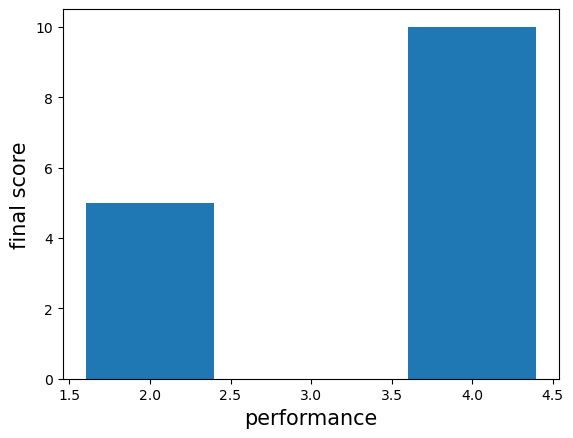

In [59]:
plt.bar(data['P(out of 5)'],data['Final'])
plt.xlabel('performance',fontsize=15)
plt.ylabel("final score",fontsize=15)
plt.show()